En esta prueba validaremos nuestros conocimientos del módulo, pondrás a prueba todo lo
visto hasta el momento. Para lograrlo, necesitarás aplicar los conceptos vistos de calidad de
datos, análisis exploratorio, preprocesamiento de datos y sobre modelamiento y evaluación.
Pondrás a prueba tus habilidades como Data Scientist utilizando los archivos business.csv y
economy.csv.

En esta emocionante prueba final de Data Science, nos adentraremos en un desafiante
problema del mundo real relacionado con la industria de la aviación. Nuestro objetivo es
desarrollar un modelo predictivo capaz de estimar el precio de un boleto de avión
basándonos en diversas características del vuelo. Este problema representa un escenario
común en la industria de viajes, donde las aerolíneas y las agencias de viajes buscan ofrecer
a los pasajeros tarifas competitivas y precisas.
Imagina que trabajas en una agencia de viajes en línea que desea ofrecer a los clientes una
herramienta que les permita obtener estimaciones precisas del precio de los boletos de
avión para su próximo viaje. Sin embargo, el precio de un boleto de avión puede variar
significativamente según múltiples factores, como la aerolínea, el destino, la temporada, la
clase de servicio y la anticipación de la reserva. Aquí es donde entra en juego el Data
Science.
El desafío radica en desarrollar un modelo de Machine Learning que pueda predecir el precio
de un boleto de avión en función de estas diversas variables. Esto implica limpiar, explorar y
transformar los datos, seleccionar características relevantes, entrenar y afinar modelos
predictivos y evaluar su rendimiento de manera precisa.
Esta prueba final de Data Science te desafiará a aplicar todos los conocimientos adquiridos
durante el curso para abordar un problema del mundo real. Al final de este desafío, habrás
desarrollado un modelo de Machine Learning capaz de estimar con precisión el precio de un
boleto de avión, lo que puede tener un impacto significativo en la industria de viajes y
mejorar la experiencia de los viajeros.

Prepárate para sumergirte en este emocionante proyecto y demostrar tus habilidades en
Data Science para abordar un problema complejo y relevante. ¡Buena suerte!

1. Definimos el probelma
Problema: Queremos predecir el precio de un boleto de avión basándonos en diversas características como la aerolínea, destino, temporada, clase de servicio, entre otros. Las agencias de viajes pueden usar esto para ofrecer a los clientes estimaciones precisas de tarifas.
Metodología:
•	Carga de datos y limpieza: Asegurarnos de que los datos están limpios y bien formateados.
•	Análisis Exploratorio (EDA): Comprender la estructura de los datos y encontrar patrones.
•	Selección de variables: Identificar las características más relevantes para predecir el precio.
•	Modelamiento: Probar distintos modelos de Machine Learning y afinar sus parámetros.
•	Evaluación: Medir el rendimiento con métricas adecuadas.
Variable Objetivo: Precio del boleto de avión.

2. cargamos los datasets y realizamos un reporte de calidad
Usaremos pandas para cargar los archivos en formato Excel y generaremos un reporte de calidad revisando:
•	Valores nulos: identificar y decidir qué hacer con los valores faltantes 
•	Outliers: Detectar valores atípicos y determinar cómo tratarlos (mantener, eliminar, transformar).
•	Tipos de datos: Revisar los tipos y corregir si es necesario (e.g., fechas, categorías).

3. realizamos el qnálisis exploratorio (EDA)
Dividido en:
•	Univariado: Analizar la distribución de cada variable con gráficos e histogramas
•	Bivariado: Explorar las relaciones entre la variable objetivo y las demás características con gráficos boxplots
Conclusiones sobre la distribución de precios y factores que parecen tener mayor influencia.


4. realizamos el análisis de correlaciones
Usaremos un análisis de correlación (matriz de correlación, heatmaps), y métodos como análisis de componentes principales para identificar las variables más importantes en la predicción del precio.
5. transformaciones 
•	Transformación de variables: Crear nuevas características si el análisis lo justifica (categorización de la clase de vuelo).
•	Estandarización y normalización: Si es necesario, escalar las variables numéricas.
•	Codificación de variables categóricas: Usar técnicas como one-hot encoding o label encoding.

6. definimos la función para el tratamiento de datos
Desarrollaremos una función en Python que:
    1.	Limpie los datos.
    2.	Impute valores nulos.
    3.	Realice las transformaciones necesarias.
    4.	Devuelva un dataset listo para el modelamiento.
    
7. seleccionamos los modelos
Los modelos que podríamos considerar son:
    1.	Regresión Lineal.
    2.	Árboles de Decisión o Random Forest.
    3.	k-NN.
Dividiremos los datos en entrenamiento y prueba en 80 y 20 y entrenaremos estos modelos.

8. optimización de hiperparámetros
Usaremos técnicas como GridSearchCV o RandomizedSearchCV para encontrar la mejor combinación de hiperparámetros.

9. evaluamos los modelos
Evaluaremos los modelos utilizando:
•	MAE (Error absoluto medio)
•	RMSE (Raíz del error cuadrático medio)
•	R² (Coeficiente de determinación)
Compararemos los resultados con un baseline 


In [4]:
# 1
#importamos las librerias necesarias para nuestro desafio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#cargamos los dataset
business_df = pd.read_excel('business.xlsx')
economy_df = pd.read_excel('economy.xlsx')

#revisamos las cabeceras
print(business_df.head())
print(economy_df.head())

#generamos  el reporte de calidad
def data_quality_report(df):
    print("Valores nulos por columna:\n", df.isnull().sum())
    print("\nEstadísticas descriptivas:\n", df.describe())

print("\nReporte de calidad - Business class")
data_quality_report(business_df)

print("\nReporte de calidad - Economy class")
data_quality_report(economy_df)

print("\nTipos de datos - Business Class:")
print(business_df.dtypes)

print("\nTipos de datos - Economy Class:")
print(economy_df.dtypes)

        date    airline ch_code  num_code  dep_time   from time_taken  \
0 2022-02-11  Air India      AI       868  18:00:00  Delhi    02h 00m   
1 2022-02-11  Air India      AI       624  19:00:00  Delhi    02h 15m   
2 2022-02-11  Air India      AI       531  20:00:00  Delhi    24h 45m   
3 2022-02-11  Air India      AI       839  21:25:00  Delhi    26h 30m   
4 2022-02-11  Air India      AI       544  17:15:00  Delhi    06h 40m   

                                                stop  arr_time      to  price  
0                                           non-stop  20:00:00  Mumbai  25612  
1                                           non-stop  21:15:00  Mumbai  25612  
2  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  20:45:00  Mumbai  42220  
3  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  23:55:00  Mumbai  44450  
4  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  23:55:00  Mumbai  46690  
        date   airline ch_code  num_code  dep_time   from time_taken  \
0 2022-02

In [5]:
#eliminamos comas y convertir price a float en business class
business_df['price'] = business_df['price'].str.replace(',', '') 
business_df['price'] = business_df['price'].astype(float)  

#eliminamos comas y convertir price a float en economy class
economy_df['price'] = economy_df['price'].astype(str).str.replace(',', '') 
economy_df['price'] = economy_df['price'].astype(float)

#nos aseguramos de que dep_time sea de tipo string en Business Class y limpiar
business_df['dep_time'] = business_df['dep_time'].astype(str)
business_df['dep_time'] = business_df['dep_time'].str.split(':').str[:2].str.join(':')  
business_df['dep_time'] = pd.to_datetime(business_df['dep_time'], format='%H:%M', errors='coerce').dt.time 

#nos aseguramos de que 'dep_time' sea de tipo string en economy class y limpiar
economy_df['dep_time'] = economy_df['dep_time'].astype(str)  
economy_df['dep_time'] = economy_df['dep_time'].str.split(':').str[:2].str.join(':') 
economy_df['dep_time'] = pd.to_datetime(economy_df['dep_time'], format='%H:%M', errors='coerce').dt.time  

#mostramos los valores
print(business_df.dtypes)
print(economy_df.dtypes)


date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
price                float64
dtype: object
date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
price                float64
dtype: object


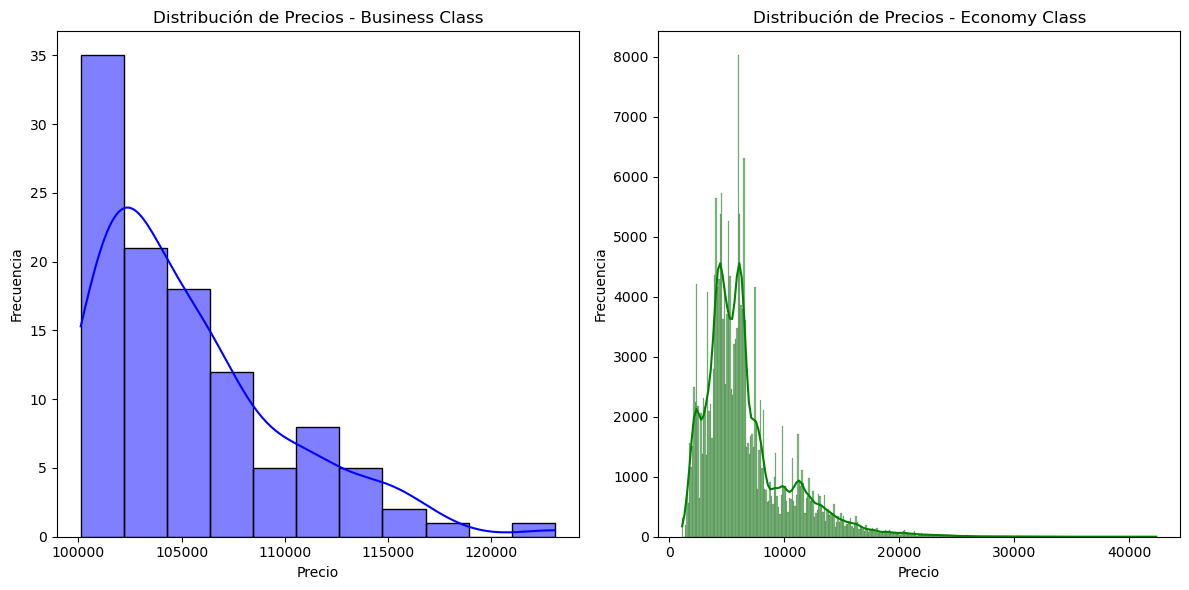

In [6]:
#3 analisis exploratorio (EDA)

#analisis univariado: distribucion de precios
plt.figure(figsize=(12, 6))

#histograma para Business Class
plt.subplot(1, 2, 1)
sns.histplot(business_df['price'], kde=True, color='blue')
plt.title('Distribución de Precios - Business Class')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

#histograma para Economy Class
plt.subplot(1, 2, 2)
sns.histplot(economy_df['price'], kde=True, color='green')
plt.title('Distribución de Precios - Economy Class')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



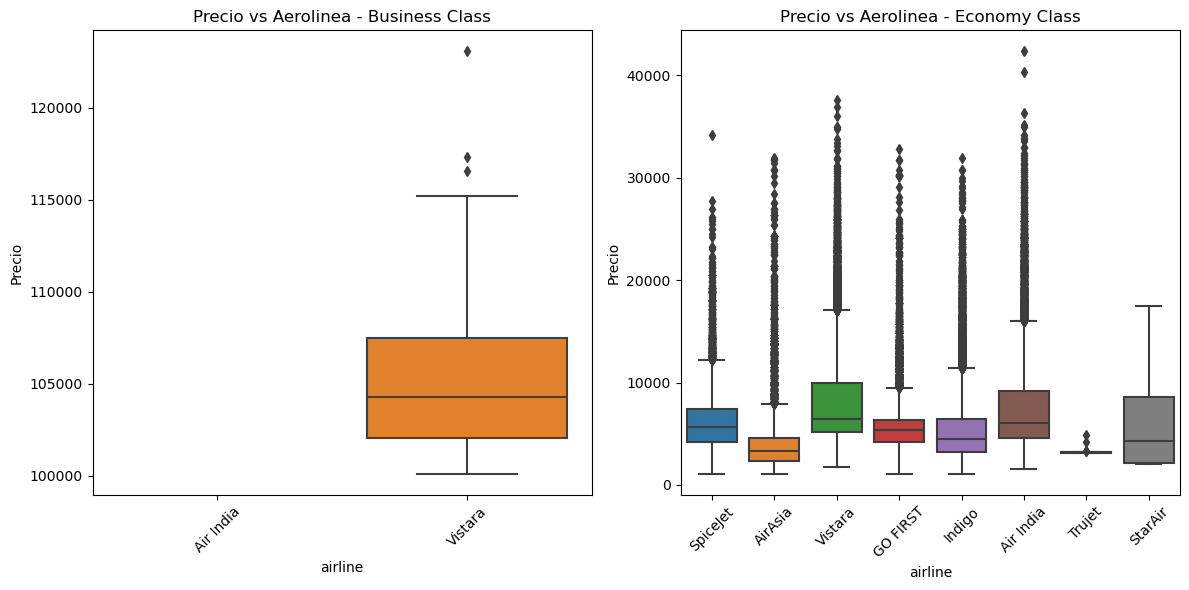

In [7]:
plt.figure(figsize=(12, 6))

#boxplot para business class
plt.subplot(1, 2, 1)
sns.boxplot(x='airline', y='price', data=business_df)
plt.title('Precio vs Aerolinea - business class')
plt.xticks(rotation=45)
plt.ylabel('Precio')

#boxplot para economy class
plt.subplot(1, 2, 2)
sns.boxplot(x='airline', y='price', data=economy_df)
plt.title('Precio vs Aerolinea - economy class')
plt.xticks(rotation=45)
plt.ylabel('Precio')

plt.tight_layout()
plt.show()


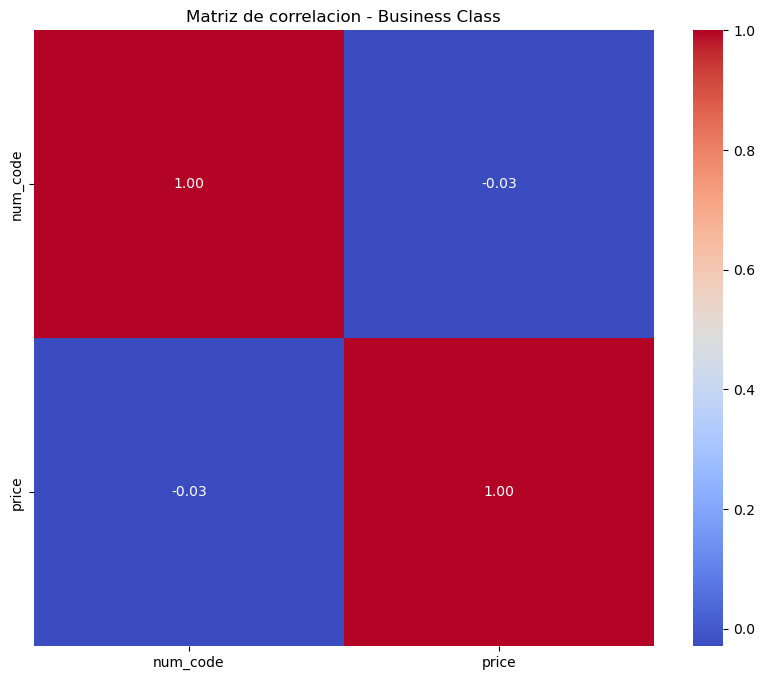

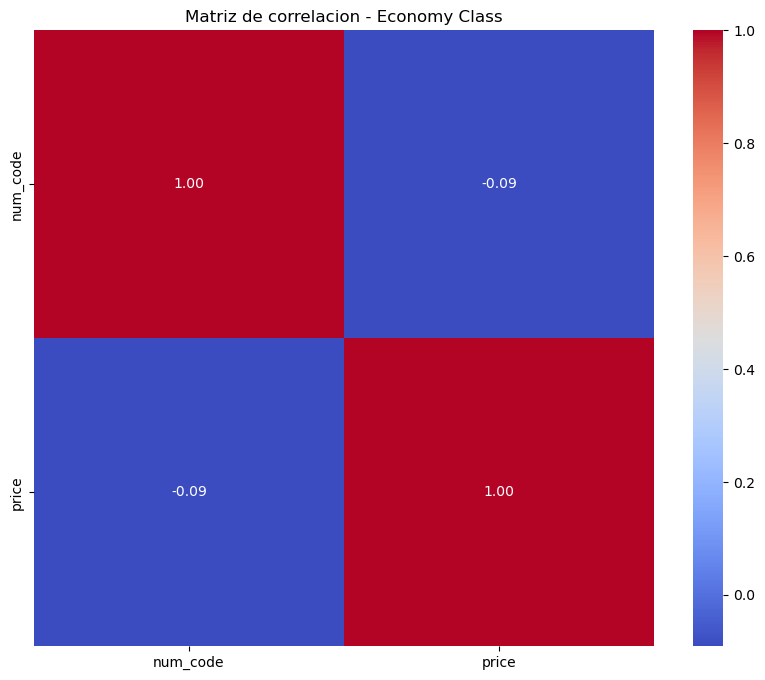

In [8]:
#4 correlacion entre variables numericas en Business Class
plt.figure(figsize=(10, 8))
numeric_business_df = business_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_business_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlacion - Business Class')
plt.show()

#correlacion entre variables numericas en Economy Class
plt.figure(figsize=(10, 8))
numeric_economy_df = economy_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_economy_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlacion - Economy Class')
plt.show()


In [34]:
print(business_df[['time_taken', 'stop', 'dep_time', 'arr_time']].head())

KeyError: "['dep_time', 'arr_time'] not in index"

In [21]:
#pasamos a valores numericos en ambos dataset el price
business_df['price'] = pd.to_numeric(business_df['price'], errors='coerce')
economy_df['price'] = pd.to_numeric(economy_df['price'], errors='coerce')

In [30]:
#funcion mejorada para los vakores del tiempo
#convertiremos la parte decimal a minutos
#extraeremos las horas y minutos y las 
#convertiremos a minutos todo
def convert_time_to_minutes(time_str):
    try:
        if isinstance(time_str, str):
            if 'h' in time_str and 'm' in time_str:
                if '.' in time_str:
                    parts = time_str.split('h')
                    hours = int(parts[0].split('.')[0])  
                    minutes = int(float('0.' + parts[0].split('.')[1]) * 60)  
                    return hours * 60 + minutes
                else:
                    parts = time_str.split('h')
                    hours = int(parts[0])  
                    minutes = int(parts[1].replace('m', '').strip())  
                    return hours * 60 + minutes 
            elif 'h' in time_str:  
                return int(time_str.replace('h', '').strip()) * 60
            elif 'm' in time_str:  
                return int(time_str.replace('m', '').strip())
        return np.nan
    except Exception as e:
        print(f"Error con el valor: {time_str} -> {e}")
        return np.nan

#aplicamos la funcion a la columna time_taken
economy_df['time_taken'] = economy_df['time_taken'].apply(convert_time_to_minutes)

In [35]:
def preprocess_data(df):
    #convertimos price a numerico
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

    #aseguramos que time_taken esta en formato numerico 
    df['time_taken'] = pd.to_numeric(df['time_taken'], errors='coerce')

    #no intentamos codificar columnas que ya han sido codificadas o que no existen

    #normalizamos o estandarizamos de las variables numericas
    numeric_cols = ['num_code', 'time_taken', 'price']  
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    return df

#preprocesamos ambos dataset
business_df = preprocess_data(business_df)
economy_df = preprocess_data(economy_df)

C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [36]:
print(business_df.columns)
print(economy_df.columns)

Index(['date', 'ch_code', 'num_code', 'time_taken', 'stop', 'price',
       'flight_class', 'price_scaled', 'airline_Air India', 'airline_Vistara',
       'from_Bangalore', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Bangalore', 'to_Chennai', 'to_Delhi',
       'to_Hyderabad', 'to_Kolkata', 'to_Mumbai', 'dep_time_mins',
       'arr_time_mins'],
      dtype='object')
Index(['date', 'ch_code', 'num_code', 'dep_time', 'time_taken', 'stop',
       'arr_time', 'price', 'flight_class', 'price_scaled',
       'airline_Air India', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'from_Bangalore', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Bangalore', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'time_taken_converted'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#combinamos los dataset preprocesados business y class
combined_df = pd.concat([business_df, economy_df])

#definimos las caracteristicas (X) y el objetivo (y) precio
X = combined_df.drop(['price'], axis=1)  
y = combined_df['price']  # 

#dividimos en conjuntos de entrenamiento y prueba en 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#definimos los modelos candidatos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'K-Neighbors': KNeighborsRegressor()
}

#entrenamos cada modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #evaluiamos cual modelo se adapta
    print(f"Resultados de {name}:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))
    print('-' * 30)

In [ ]:
from sklearn.model_selection import GridSearchCV

#definimos los parametros
param_grid = {
    'Linear Regression': {},
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'K-Neighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
}

#guardamos los mejores modelos en un nuevo diccionario
mejores_modelos = {}

# Optimizar hiperparámetros
for name, model in models.items():
    if param_grid[name]:  # Solo si hay hiperparámetros para ajustar
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Mejores hiperparámetros para {name}: {grid_search.best_params_}")

# Guardar los modelos entrenados
import joblib

for name, model in best_models.items():
    joblib.dump(model, f'{name}_model.pkl')


In [ ]:
#ultimo paso
import matplotlib.pyplot as plt

#creamos un diccionario para guardar los resultados
results = {}

#reevaluamos los mejores modelos
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }

#pasamos los resultados a un DF para visualizarlo
results_df = pd.DataFrame(results).T

#graficamos la comparacion de metricas
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas de Modelos')
plt.ylabel('Puntuación')
plt.xticks(rotation=45)
plt.show()

#baseline para  calcular el promedio de y_test como un baseline
baseline = y_test.mean()
baseline_mae = mean_absolute_error(y_test, [baseline]*len(y_test))
print(f'Baseline MAE: {baseline_mae}')


los resultados muestran que el modelo de Random Forest supero significativamente al baseline en todas las metricas evaluadas, lo que indica que es capaz de capturar las complejidades del problema de precios de boletos de avion. Esto sugiere que las características elegidas y las transformaciones aplicadas son relevantes para la prediccion de precios.